In [1]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime, timedelta
# df.columns.values.tolist()

In [2]:
# Read data
path_to_obs = Path('/local/mwe14avu/UEA/PhD/obs/INTEX-B_C130')
# Read row numbers where the data starts
file_rows_list = []
for i in sorted(path_to_obs.glob('*R0_ICT2.ict')):
    file_rows_list.append(pd.read_csv(i, delimiter=', ', header=None, usecols=[0], engine='python', nrows=1))
file_rows_df = pd.concat(file_rows_list, sort=False)
# Read data and flight dates
raw_df_list, flight_dates_list = [], []
for i, j in zip(sorted(path_to_obs.glob('*R0_ICT2.ict')), file_rows_df[0].values):
    raw_df_list.append(pd.read_csv(i, delimiter=', ', header='infer', engine='python', skiprows=j-1, na_values=[-777.0, -888.0, -999.0, -99999.0]))
    flight_dates_list.append(pd.read_csv(i, delimiter=', ', header=None, usecols=[0,1,2], engine='python', skiprows=6, nrows=1))
raw_df = pd.concat(raw_df_list, sort=False)
flight_dates_df = pd.concat(flight_dates_list, sort=False)

In [3]:
# Convert raw flight dates into datetimes
yrs, mns, das = flight_dates_df[0].values, flight_dates_df[1].values, flight_dates_df[2].values
times = []
for idf, yr, mn, da in zip(raw_df_list, yrs, mns, das):
    for entry in idf['Mid_UTC']:
        times.append(datetime(yr, mn, da) + timedelta(seconds=entry))

In [4]:
# Chose columns and rename them
column_dict = {'Mid_UTC': 'time', 'GGLAT_nav': 'lat', 'GGLON_nav': 'lon', 'PALT_nav': 'alt',
               'Ethane_pptv_Blake': 'c2h6',
               'Propane_pptv_Blake': 'c3h8',
               'n-Butane_pptv_Blake': 'nc4h10',
               'i-Butane_pptv_Blake': 'ic4h10',
               'n-Pentane_pptv_Blake': 'nc5h12',
               'i-Pentane_pptv_Blake': 'ic5h12',
               'MeONO2_pptv_Blake': 'meono2',
               'EtONO2_pptv_Blake': 'etono2',
               'n-PrONO2_pptv_Blake': 'nprono2',
               'i-PrONO2_pptv_Blake': 'iprono2',
               '2-BuONO2_pptv_Blake': 'sbuono2',
               '2-PenONO2_pptv_Blake': 'n2peono2',
               '3-PenONO2_pptv_Blake': 'n3peono2'}

In [5]:
# Clean up
df = raw_df[list(column_dict.keys())].rename(index=str, columns=column_dict)
df.time = times
df.head()

,time,lat,lon,alt,c2h6,c3h8,nc4h10,ic4h10,nc5h12,ic5h12,meono2,etono2,nprono2,iprono2,sbuono2,n2peono2,n3peono2
0,2006-02-28 16:07:03.000,39.026306,255.390537,5315.468704,439.0,80.0,NaN,NaN,NaN,NaN,5.77,1.14,0.18,1.33,0.69,NaN,NaN
1,2006-02-28 16:16:14.000,38.366385,255.556848,5874.424242,440.0,154.0,5.0,NaN,NaN,NaN,6.24,1.13,0.29,1.63,0.63,NaN,0.06
2,2006-02-28 16:24:47.500,37.761245,256.006446,5872.136462,471.0,133.0,6.0,NaN,NaN,NaN,5.24,1.18,0.25,2.18,1.04,0.05,0.08
3,2006-02-28 16:33:20.000,37.189135,256.470200,5863.862833,492.0,124.0,NaN,NaN,NaN,NaN,4.80,1.12,0.20,1.66,0.80,NaN,0.03
4,2006-02-28 16:41:00.500,36.691887,256.951311,5872.751967,518.0,158.0,5.0,NaN,NaN,NaN,4.24,1.01,0.19,1.35,0.82,0.05,0.05


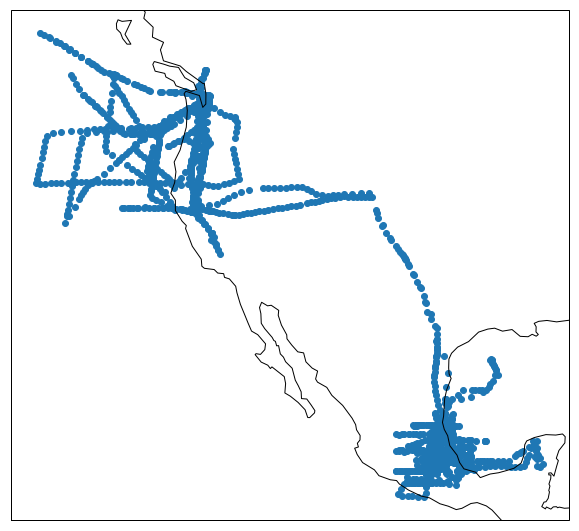

In [17]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=270)), facecolor='w')
ax.scatter(df.lon, df.lat, transform=ccrs.PlateCarree())
ax.coastlines()
# ax.set_global()